##Unzip File  &  Pip version update


In [1]:
!pip3 install --upgrade tensorflow-gpu

  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 2.0
    Uninstalling flatbuffers-2.0:
      Successfully uninstalled flatbuffers-2.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires keras<2.9,>=2.8.0rc0, but you have keras 2.9.0 which is incompatible.
tensorflow 2.8.0 requires tensorboard<2.9,>=2.8, but you have tensorboard 2.9.0 which is incompatible.


In [2]:
!pip install keras
!pip install git+https://github.com/keras-team/keras-preprocessing.git
!pip install livelossplot

  Cloning https://github.com/keras-team/keras-preprocessing.git to c:\users\sifa\appdata\local\temp\pip-req-build-xrobzm2y
  Resolved https://github.com/keras-team/keras-preprocessing.git to commit 3e380065d4afc7347aaee8d89325a16b22158438


  Running command git clone -q https://github.com/keras-team/keras-preprocessing.git 'C:\Users\Sifa\AppData\Local\Temp\pip-req-build-xrobzm2y'


In [3]:
!pip install keras.utils 

  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=b3f00476dd13bb8e40914de4ee4290c15fdbf47b01436645ed3915d2c791cc01
  Stored in directory: c:\users\sifa\appdata\local\pip\cache\wheels\fd\b9\6e\25d4c3a3c0319873aeeab6592c5b4bb9e2af0fec21a0b5188c
Successfully built keras.utils


In [4]:
!pip install scikit-neuralnetwork

  Using cached Theano-1.0.5.tar.gz (2.8 MB)
  Created wheel for scikit-neuralnetwork: filename=scikit_neuralnetwork-0.7-py3-none-any.whl size=41700 sha256=66f289de71d0d135bb735f3704f3d4767b4305d6bca1d626761e4aa8818e9dc2
  Stored in directory: c:\users\sifa\appdata\local\pip\cache\wheels\21\a8\91\3ba50335c55ec89bf4197510be97b76a31fb6ea7c4da5e6352
  Created wheel for Lasagne: filename=Lasagne-0.1-py3-none-any.whl size=79292 sha256=0e58b864877e7df11738400ed469ae35ffca1d45ce73f16316d4659d8e754667
  Stored in directory: c:\users\sifa\appdata\local\pip\cache\wheels\de\c8\58\09985ed559ace44cd6874b5e5ec4973e24eb35b1c818f4db32
  Created wheel for Theano: filename=Theano-1.0.5-py3-none-any.whl size=2668124 sha256=37f753482a55dabf5dab2793867c24f192e0e495e0591016ac04945876102f31
  Stored in directory: c:\users\sifa\appdata\local\pip\cache\wheels\12\d8\36\e9b7c617ca8be398dcc48621c539d0cb1d41ff04e4367fc235
Successfully built scikit-neuralnetwork Lasagne Theano


In [5]:
!pip install -U scikit-learn scipy matplotlib

  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [6]:

!pip install 'matplotlib<3.3.0'

The system cannot find the file specified.


## İmport Libary

In [349]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import cv2
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.layers import Conv2D, MaxPooling2D, Dense, Input, Flatten, Dropout, UpSampling2D, GlobalAveragePooling2D
from keras.models import Model
from keras import metrics
from tensorflow.keras.optimizers import Adam, Adamax
from keras import callbacks, layers, Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


import warnings
%matplotlib inline

In [409]:
# Device and parameters setting
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))

print("TensorFlow Version :", tf.__version__)
print("Keras Version      :", keras.__version__)
#Hyperparameters
image_size = 224
target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)
batch_size = 128



category={
    0: 'Fasulye', 1: 'Acı Kabak', 2: 'Kabak', 3 : 'Yeşil Patlıcan', 4: "Brokoli", 5: 'Lahana', 6: 'Biber', 7: 'Havuç', 8: 'Karnabahar',
    9: 'Salatalık', 10: 'Papaya', 11: 'Patates', 12: 'Bal Kabağı', 13 : "Turp", 14: "Domates"
}




Num GPUs Available:  0
TensorFlow Version : 2.9.0
Keras Version      : 2.9.0


In [410]:
dataset_root= 'D:\Final_Project_Hkaraman\Vegetable Images'

train_folder =os.path.join(dataset_root,'train')
valid_folder =os.path.join(dataset_root,'validation')
test_folder =os.path.join(dataset_root,'test')



## Dataloader Datase

In [232]:
#Augmentiation
train_aug = tf.keras.preprocessing.image.ImageDataGenerator( 
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
)


# Augmentations for test data
test_aug =  tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)


# Augmentations for valid data 
valid_aug = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)



train_data = train_aug.flow_from_directory(train_folder,
                                              target_size=(image_size, image_size),
                                              batch_size=batch_size,
                                              shuffle=True,
                                              class_mode="categorical",
                                              seed=42,
                                          )



# Read test_data from directory
test_data = test_aug.flow_from_directory(test_folder,
                                         target_size=(image_size, image_size),
                                         batch_size=batch_size,
                                         shuffle = False,
                                         class_mode="categorical",
                                         seed=42
)

# Read valid_data from directory
valid_data = valid_aug.flow_from_directory(valid_folder,
                                         target_size=(image_size, image_size),
                                         batch_size=batch_size,
                                         shuffle = True,
                                         class_mode="categorical",
                                         seed=42
)


Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [233]:
train_data
cats = list(train_data.class_indices.keys())

Found 15000 files belonging to 15 classes.


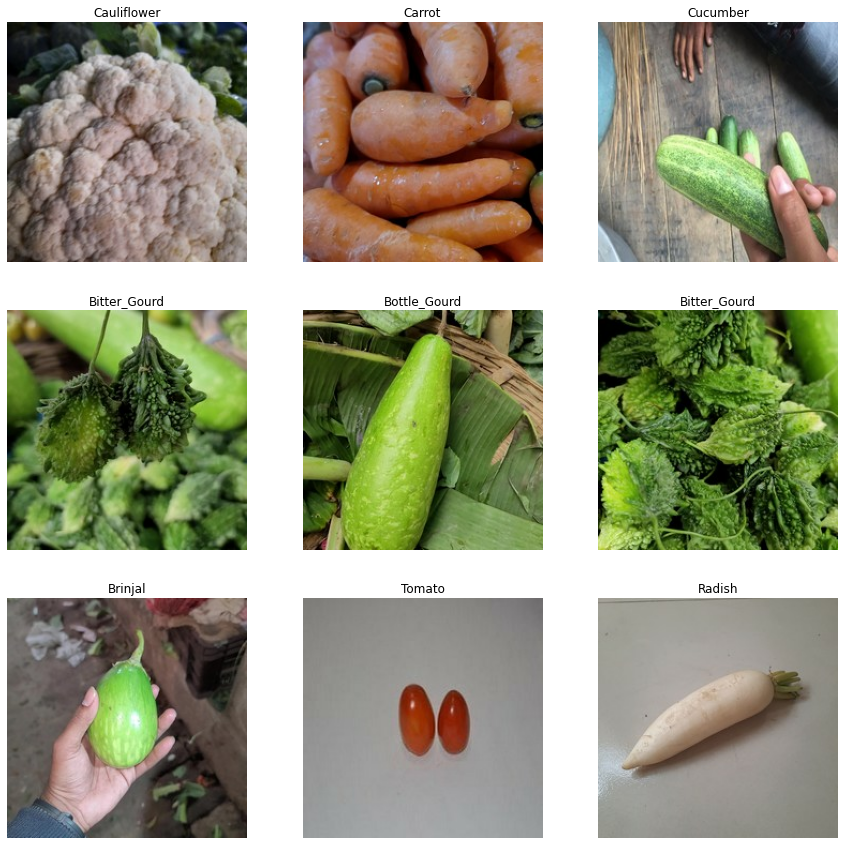

In [234]:
##Get Simple İmages
getimages=image_dataset_from_directory(train_folder,
                                             shuffle=True,
                                             batch_size=32,
                                             image_size=[image_size,image_size],
                                             )

class_names = getimages.class_names

plt.figure(figsize=(15, 15))
for images, labels in getimages.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

## Get Features(X) & Label(y)


In [235]:
X_train, y_train = next(train_data)
X_test, y_test = next(valid_data)
# -1 in reshape, means to let Numpy define the appropriate data dimensions
X_train = np.array(X_train).reshape(-1, image_size, image_size, 3)
y_train = np.asarray(y_train)
X_test  = np.array(X_test).reshape(-1, image_size, image_size, 3)
y_test  = np.asarray(y_test)

print("X_train :", X_train.shape)
print("y_train :", y_train.shape)
print("X_test  :", X_test.shape)
print("y_test  :", y_test.shape)

X_train : (128, 224, 224, 3)
y_train : (128, 15)
X_test  : (128, 224, 224, 3)
y_test  : (128, 15)


##Modified MobileNetv2

In [236]:
# Load the base model
mbnet_v2 = keras.applications.MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=input_shape,
    
)

# Stop from being trainable
mbnet_v2.trainable = False

In [237]:
mbnet_v2.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_29 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_29[0][0]']               
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [238]:
 #Define the layers
inputs = mbnet_v2.input

# Get the layer
x = mbnet_v2(inputs)

# Stack layers further
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(len(cats), activation="softmax")(x)

# Combine the model
model = Model(inputs=inputs, outputs=x)

# Summary
model.summary()

Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_29 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_35  (None, 1280)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_29 (Dropout)        (None, 1280)              0         
                                                                 
 dense_43 (Dense)            (None, 15)                19215     
                                                                 
Total params: 2,277,199
Trainable params: 19,215
Non-train

In [239]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [240]:
# Num epochs
callback = tf.keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)
epochs = 10
# Train model
history = model.fit(
    train_data,
    epochs=epochs,
    validation_data=valid_data,
    steps_per_epoch=70,
    callbacks=[tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/10
70/70 [==============================] - 146s 2s/step - loss: 0.7381 - accuracy: 0.8171 - val_loss: 0.1349 - val_accuracy: 0.9813
Epoch 2/10
70/70 [==============================] - 156s 2s/step - loss: 0.1127 - accuracy: 0.9822 - val_loss: 0.0688 - val_accuracy: 0.9913
Epoch 3/10
70/70 [==============================] - 143s 2s/step - loss: 0.0669 - accuracy: 0.9898 - val_loss: 0.0469 - val_accuracy: 0.9943
Epoch 4/10
70/70 [==============================] - 142s 2s/step - loss: 0.0481 - accuracy: 0.9925 - val_loss: 0.0349 - val_accuracy: 0.9950
Epoch 5/10
70/70 [==============================] - 147s 2s/step - loss: 0.0376 - accuracy: 0.9946 - val_loss: 0.0271 - val_accuracy: 0.9963
Epoch 6/10
70/70 [==============================] - 143s 2s/step - loss: 0.0282 - accuracy: 0.9971 - val_loss: 0.0224 - val_accuracy: 0.9970
Epoch 7/10
70/70 [==============================] - 153s 2s/step - loss: 0.0239 - accuracy: 0.9971 - val_loss: 0.0194 - val_accuracy: 0.9980
Epoch 8/10
70

In [241]:
results = model.evaluate(test_data, verbose=0)
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Accuracy: 99.77%


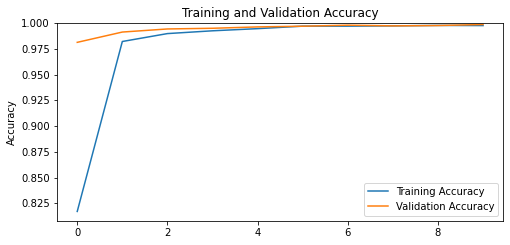

In [242]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.show()

In [243]:
predictions = np.argmax(model.predict(test_data), axis=1)

cm = confusion_matrix(test_data.labels, predictions)
clr = classification_report(test_data.labels, predictions, target_names=test_data.class_indices, zero_division=0)

24/24 [==============================] - 36s 1s/step


In [244]:
predictions

array([ 0,  0,  0, ..., 14, 14, 14], dtype=int64)

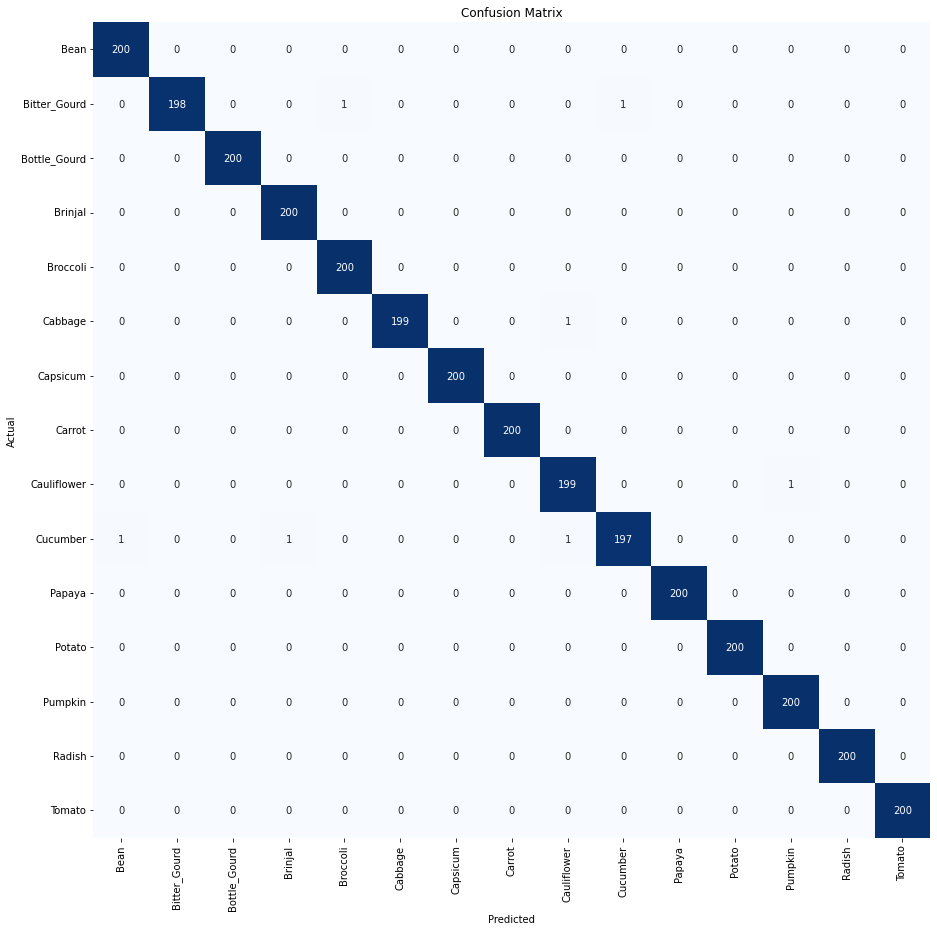

In [245]:
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(15) + 0.5, labels=test_data.class_indices, rotation=90)
plt.yticks(ticks=np.arange(15) + 0.5, labels=test_data.class_indices, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [246]:
print(clr)

              precision    recall  f1-score   support

        Bean       1.00      1.00      1.00       200
Bitter_Gourd       1.00      0.99      0.99       200
Bottle_Gourd       1.00      1.00      1.00       200
     Brinjal       1.00      1.00      1.00       200
    Broccoli       1.00      1.00      1.00       200
     Cabbage       1.00      0.99      1.00       200
    Capsicum       1.00      1.00      1.00       200
      Carrot       1.00      1.00      1.00       200
 Cauliflower       0.99      0.99      0.99       200
    Cucumber       0.99      0.98      0.99       200
      Papaya       1.00      1.00      1.00       200
      Potato       1.00      1.00      1.00       200
     Pumpkin       1.00      1.00      1.00       200
      Radish       1.00      1.00      1.00       200
      Tomato       1.00      1.00      1.00       200

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00   

## Modified Nasnetmobile 

In [247]:
# Load the base model
nasnet = keras.applications.nasnet.NASNetMobile(
    weights="imagenet",
    include_top=False,
    input_shape=input_shape
)

# Stop from being trainable
nasnet.trainable = False

In [248]:
nasnet.summary()

Model: "NASNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_30 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv1 (Conv2D)            (None, 111, 111, 32  864         ['input_30[0][0]']               
                                )                                                                 
                                                                                                  
 stem_bn1 (BatchNormalization)  (None, 111, 111, 32  128         ['stem_conv1[0][0]']             
                                )                                                            

In [249]:
 #Define the layers
inputs = nasnet.input

# Get the layer
x = nasnet(inputs)

# Stack layers further
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(len(cats), activation="softmax")(x)

# Combine the model
nasmodel = Model(inputs=inputs, outputs=x)

# Summary
nasmodel.summary()

Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_29 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_35  (None, 1280)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_29 (Dropout)        (None, 1280)              0         
                                                                 
 dense_43 (Dense)            (None, 15)                19215     
                                                                 
Total params: 2,277,199
Trainable params: 19,215
Non-train

In [250]:
nasmodel.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [251]:
# Num epochs
callback = tf.keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)
epochs = 10
# Train model
nashistory = nasmodel.fit(
    train_data,
    epochs=epochs,
    validation_data=valid_data,
    steps_per_epoch=70,
    callbacks=[tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/10
70/70 [==============================] - 264s 4s/step - loss: 0.9348 - accuracy: 0.7653 - val_loss: 0.3150 - val_accuracy: 0.9380
Epoch 2/10
70/70 [==============================] - 256s 4s/step - loss: 0.2609 - accuracy: 0.9430 - val_loss: 0.1854 - val_accuracy: 0.9627
Epoch 3/10
70/70 [==============================] - 253s 4s/step - loss: 0.1778 - accuracy: 0.9622 - val_loss: 0.1333 - val_accuracy: 0.9737
Epoch 4/10
70/70 [==============================] - 256s 4s/step - loss: 0.1334 - accuracy: 0.9713 - val_loss: 0.1074 - val_accuracy: 0.9793
Epoch 5/10
70/70 [==============================] - 255s 4s/step - loss: 0.1046 - accuracy: 0.9795 - val_loss: 0.0862 - val_accuracy: 0.9817
Epoch 6/10
70/70 [==============================] - 256s 4s/step - loss: 0.0893 - accuracy: 0.9824 - val_loss: 0.0746 - val_accuracy: 0.9853
Epoch 7/10
70/70 [==============================] - 255s 4s/step - loss: 0.0816 - accuracy: 0.9827 - val_loss: 0.0648 - val_accuracy: 0.9867
Epoch 8/10
70

In [252]:
results = nasmodel.evaluate(test_data, verbose=0)
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Accuracy: 99.20%


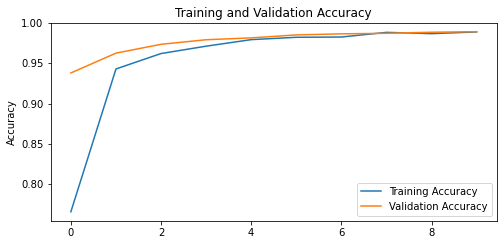

In [253]:
acc = nashistory.history['accuracy']
val_acc = nashistory.history['val_accuracy']

loss = nashistory.history['loss']
val_loss = nashistory.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.show()

In [254]:
naspredictions = np.argmax(nasmodel.predict(test_data), axis=1)

nascm = confusion_matrix(test_data.labels, naspredictions)
nasclr = classification_report(test_data.labels, naspredictions, target_names=test_data.class_indices, zero_division=0)

24/24 [==============================] - 67s 3s/step


In [255]:
naspredictions

array([ 0,  0,  0, ..., 14, 14, 14], dtype=int64)

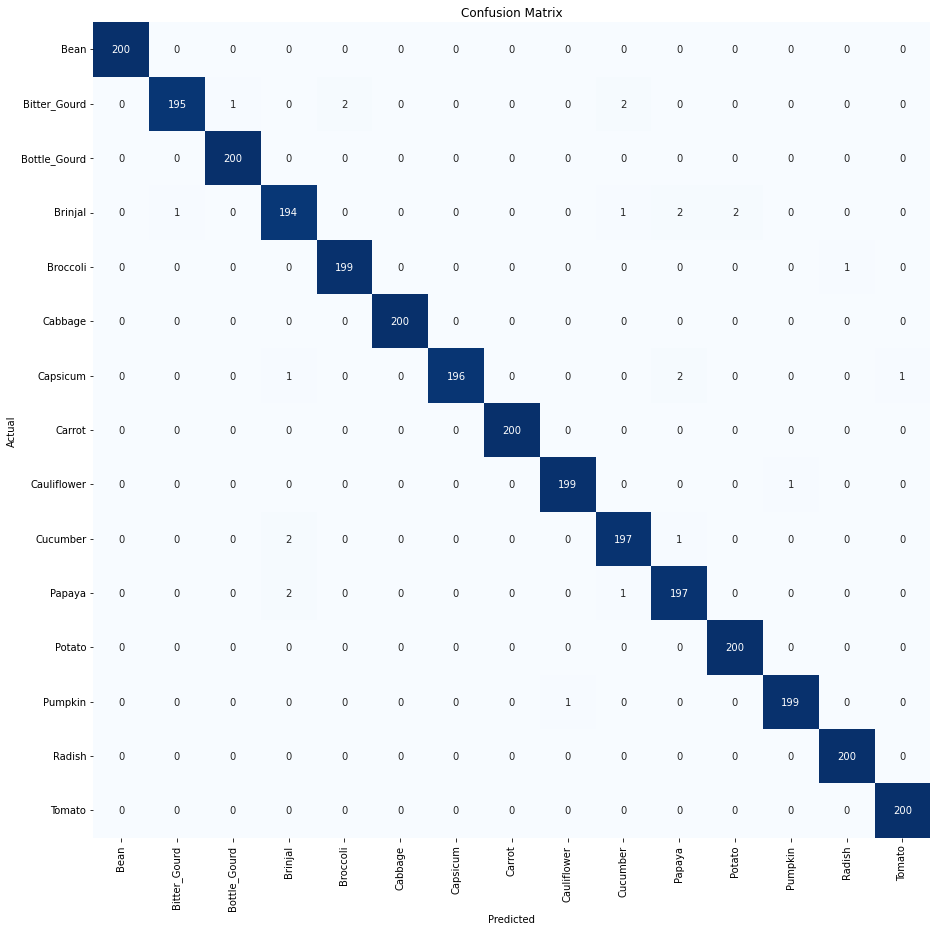

In [256]:
plt.figure(figsize=(15, 15))
sns.heatmap(nascm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(15) + 0.5, labels=test_data.class_indices, rotation=90)
plt.yticks(ticks=np.arange(15) + 0.5, labels=test_data.class_indices, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [257]:
print(nasclr)

              precision    recall  f1-score   support

        Bean       1.00      1.00      1.00       200
Bitter_Gourd       0.99      0.97      0.98       200
Bottle_Gourd       1.00      1.00      1.00       200
     Brinjal       0.97      0.97      0.97       200
    Broccoli       0.99      0.99      0.99       200
     Cabbage       1.00      1.00      1.00       200
    Capsicum       1.00      0.98      0.99       200
      Carrot       1.00      1.00      1.00       200
 Cauliflower       0.99      0.99      0.99       200
    Cucumber       0.98      0.98      0.98       200
      Papaya       0.98      0.98      0.98       200
      Potato       0.99      1.00      1.00       200
     Pumpkin       0.99      0.99      0.99       200
      Radish       1.00      1.00      1.00       200
      Tomato       1.00      1.00      1.00       200

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99   

In [258]:
model.save("Compare_Vegatblesdataset_Mobilenetv2_NasnetMobile.h5")

In [406]:
def predict_image(filename,model):
    img_ = image.load_img(filename, target_size=(224, 224))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0) 
    img_processed /= 255.   
    
    prediction = model.predict(img_processed)
    index = np.argmax(prediction)
    klass=category[index]
    probability=prediction[0][index]*100
    plt.title("Prediction - {}".format(category[index]))
    plt.imshow(img_array)
    print(f'Bu Görüntü tahmini {klass} olma olasılığı {probability:6.2f} %')

1/1 [==============================] - 0s 29ms/step
Bu Görüntü tahmini Brokoli olma olasılığı  71.81 %


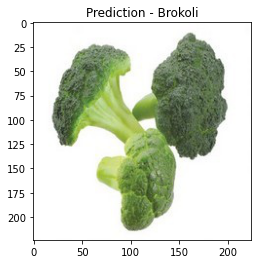

In [443]:
predict_image(os.path.join(valid_folder,'Broccoli/1373.jpg'),model)

1/1 [==============================] - 0s 65ms/step
Bu Görüntü tahmini Brokoli olma olasılığı  90.91 %


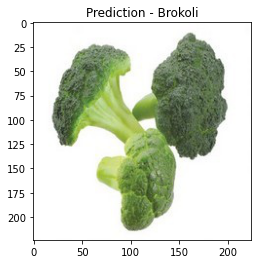

In [444]:
predict_image(os.path.join(valid_folder,'Broccoli/1373.jpg'),nasmodel)